In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

In [2]:
df = pd.read_csv("datasets/Madrid air bnb/listings_detailed.csv")

In [3]:
from collections import Counter

Counter(df["neighborhood_overview"].isnull())

Counter({True: 8062, False: 11556})

In [4]:
df["host_name"]

0           Simon
1           Abdel
2           Jesus
3               A
4        Agustina
           ...   
19613      Belaid
19614      Belaid
19615      Belaid
19616      Belaid
19617      Belaid
Name: host_name, Length: 19618, dtype: object

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27835 (\N{CJK UNIFIED IDEOGRAPH-6CBB})

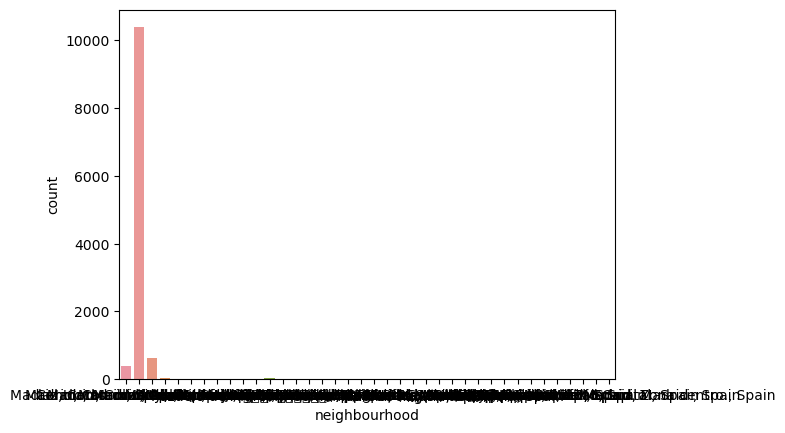

In [5]:
sns.countplot(df["neighbourhood"])

In [6]:
Counter(df["neighbourhood"])

Counter({nan: 8062,
         'Madrid, Spain': 404,
         'Madrid, Comunidad de Madrid, Spain': 10390,
         'Madrid, Community of Madrid, Spain': 616,
         'Madrid, Spain, Spain': 49,
         'Madrid, Comunidad de  Madrid, Spain': 1,
         'Centro, Madrid, Community of Madrid, Spain': 1,
         'las matas  madrid, Community of Madrid, Spain': 1,
         'Madrid , Madrid, Spain': 12,
         'Madrid, madrid, Spain': 2,
         'madrid, Comunidad de Madrid, Spain': 1,
         'Madrid, MADRID, Spain': 1,
         'Madrid , Comunidad de Madrid, Spain': 24,
         'Apartment 3-I, Madrid, Spain': 2,
         'Madrid, Comunidad de Madrid, ES, Madrid, Spain': 4,
         '马德里, 马德里自治区, Spain': 1,
         'Pozuelo de Alarcón, Comunidad de Madrid, Spain': 3,
         'Madrid, Palos de Moguer , Spain': 1,
         'Madrid, Comunidad de Madrid, ES, madrid, Spain': 1,
         'Madrid, Comunidad de Madrid , Atocha, Spain': 2,
         'Madrid, La Latina/Palacio , Madrid, Spain

In [7]:
len(Counter(df["neighbourhood_cleansed"]))

128

In [10]:
df["price"]  = df["price"].apply(lambda x: float(x.strip("$").replace(",","") if pd.notnull(x) else x))


/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

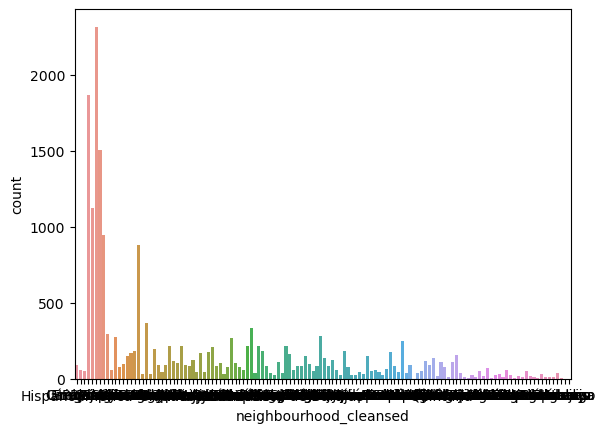

In [11]:
sns.countplot(df["neighbourhood_cleansed"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

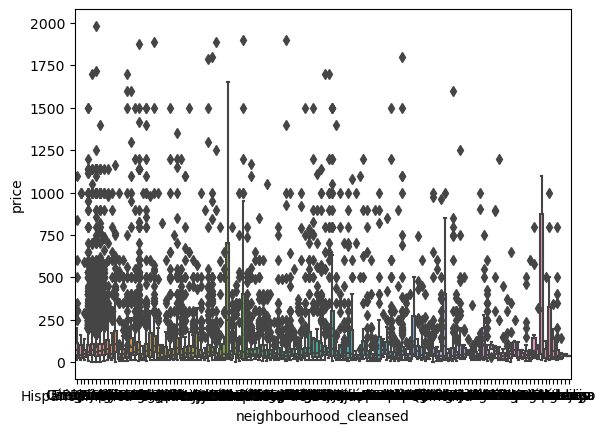

In [12]:
sns.boxplot(df["neighbourhood_cleansed"],df[df["price"] < 2000]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

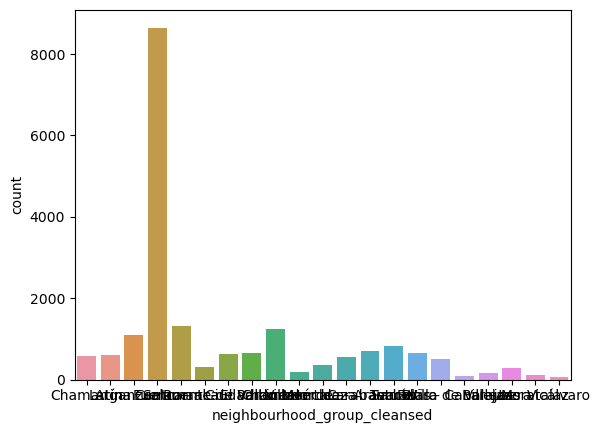

In [13]:
sns.countplot(df["neighbourhood_group_cleansed"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

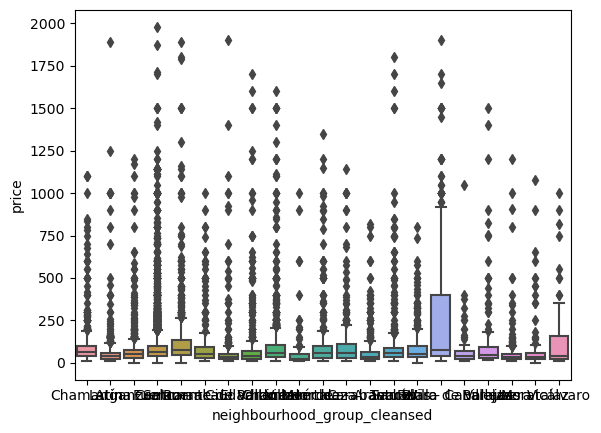

In [14]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < 2000]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

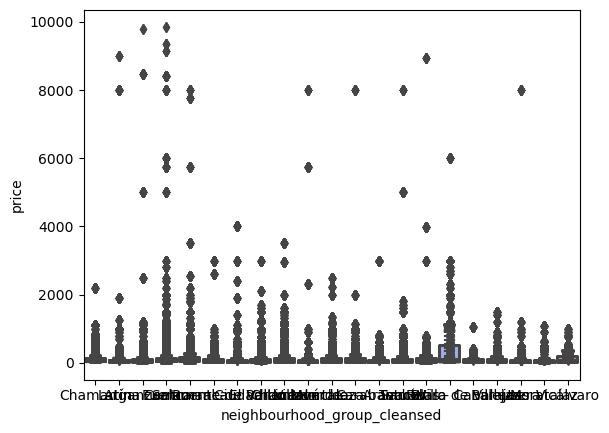

In [15]:
dict_boxplots = {}
for i in range(100,10000,100):
    dict_boxplots[f"Boxplot {i}"] = sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < i]["price"])

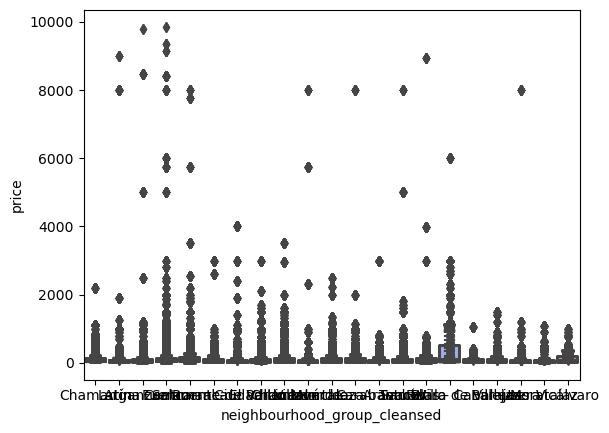

In [16]:
dict_boxplots["Boxplot 5000"].get_figure()


/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

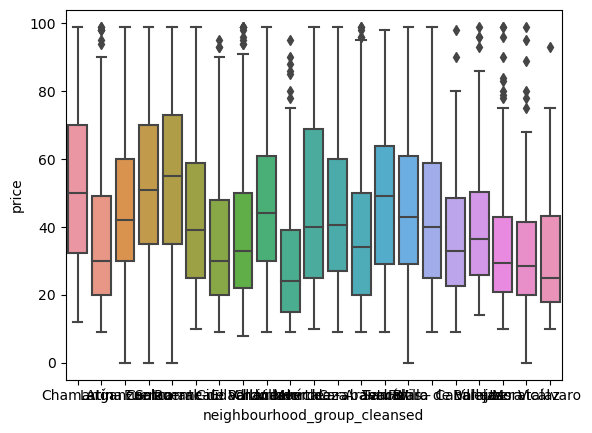

In [17]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < 100]["price"])

In [18]:
len(df[df["price"] < 100]["price"])

14648

In [19]:
len(df[df["price"].between(100,500)]["price"])

4360

In [20]:
len(df[df["price"].between(500,2000)]["price"])

636

In [21]:
len(df[df["price"].between(2000,11000)]["price"])

102

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

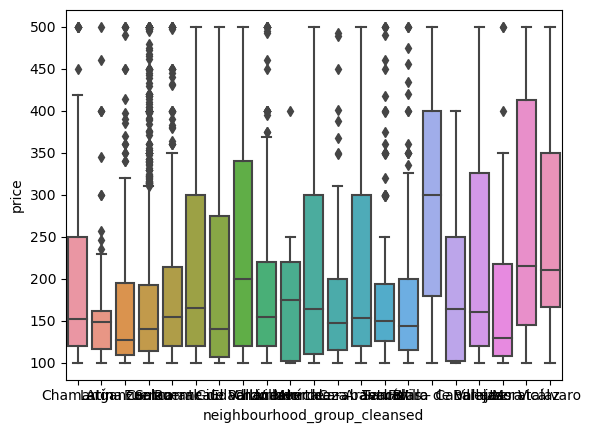

In [22]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(100,500)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

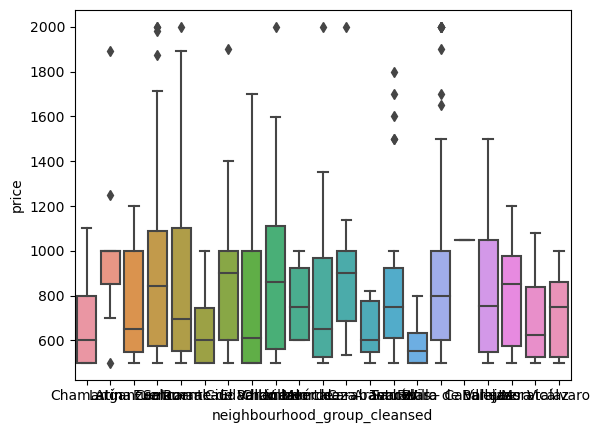

In [23]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(500,2000)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

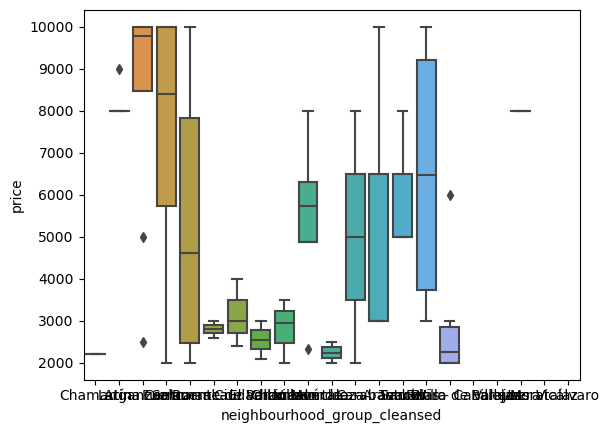

In [24]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(2000,11000)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

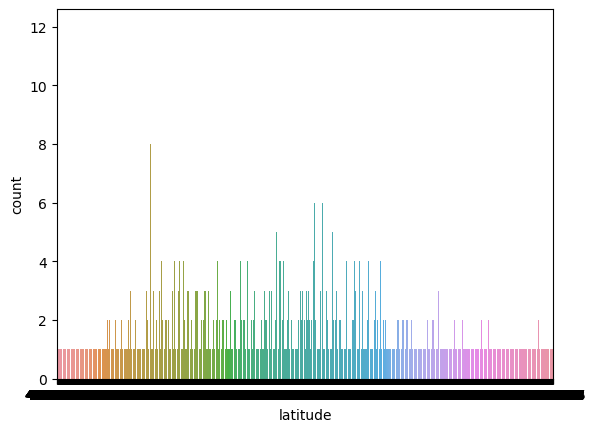

In [25]:
sns.countplot(df[df["price"] > 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

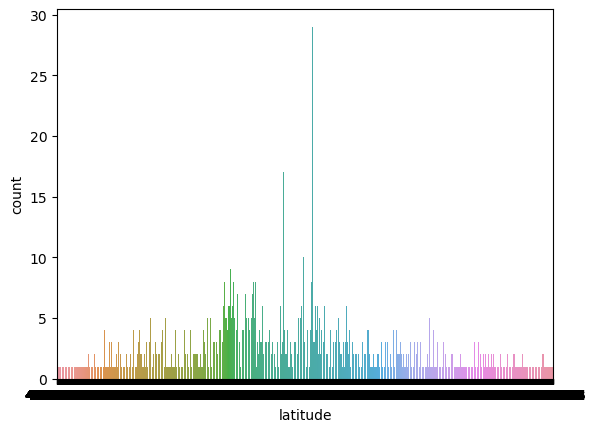

In [26]:
sns.countplot(df[df["price"] < 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='count'>

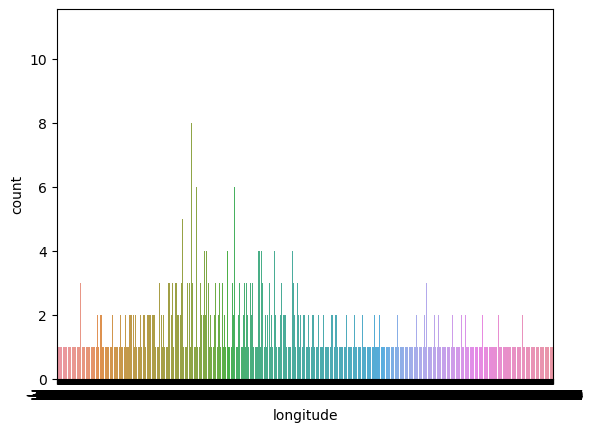

In [27]:
sns.countplot(df[df["price"] > 100]["longitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

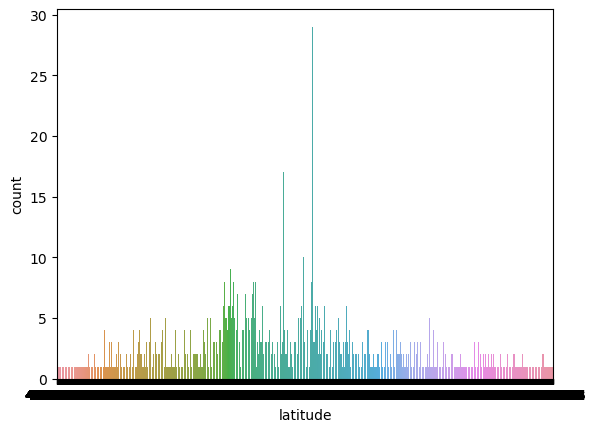

In [28]:
sns.countplot(df[df["price"] < 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

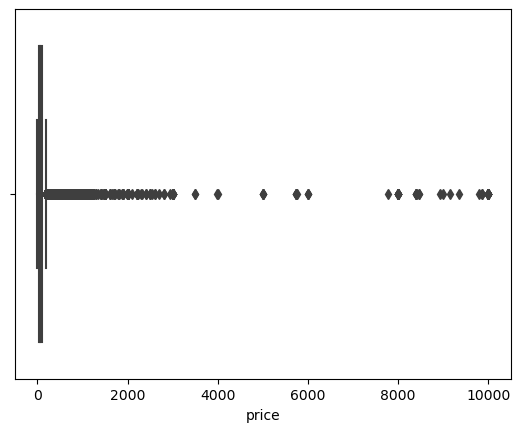

In [33]:
sns.boxplot(df[df["latitude"] < 40.5]["price"])

In [ ]:
df["latitude"]

In [ ]:
sns.boxplot(df[df["price"] > 100]["longitude"])

In [ ]:
dict_property_types = dict(Counter(df["property_type"]))

dict_property_types

In [ ]:
dict_property_types[list(dict_property_types.keys())[0]]

In [ ]:
sns.countplot(df[(df["property_type"] != "Private room in apartment") or (df["property_type"] != "Entire apartment")]["property_type"])

In [ ]:
list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)

In [ ]:
df["property_type"].values[0]

In [ ]:
for i in list_others:
    
    df["property_type"].replace(i,"Other", inplace = True)

In [ ]:
Counter(df["property_type"])

In [ ]:
sns.countplot(df["property_type"])

In [ ]:
Counter(df["room_type"])

In [ ]:
sns.countplot(df[df["room_type"] == "Shared room"]["price"])

In [ ]:
sns.countplot(df[df["room_type"] == "Hotel room"]["price"])

In [ ]:
sns.countplot(df[df["room_type"] == "Private room"]["price"])

In [ ]:
sns.countplot(df[df["room_type"] == "Entire home/apt"]["price"])

In [ ]:
sns.countplot(df[df["price"] < 100]["room_type"])

In [ ]:
sns.countplot(df[df["price"] > 100]["room_type"])

In [ ]:
sns.countplot(df[df["price"] > 100]["accommodates"])

In [ ]:
for i in df["accommodates"].values:
    
    if i > 8:
        
        df["accommodates"].replace(i,9, inplace = True)

In [ ]:
sns.countplot(df["accommodates"])

In [ ]:
Counter(df["bathrooms"].isnull())

In [ ]:
Counter(df[df["price"] < 100]["bathrooms_text"])

In [ ]:
sns.countplot(df[df["price"] < 100]["bathrooms_text"])

In [ ]:
sns.countplot(df[df["price"] > 100]["bathrooms_text"])

In [ ]:
Counter(df["bedrooms"].isnull())

In [ ]:
sns.countplot(df["bedrooms"])

In [ ]:
sns.countplot(df[df["price"] > 100]["bedrooms"])

In [ ]:
sns.countplot(df[df["price"] < 100]["bedrooms"])